#imp

In [ ]:
import pandas as pd
pd.set_option("max_colwidth", 160)
pd.set_option("display.max_columns", None)

import numpy as np
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")



def load_data(file_path, indx = True, indx_col = 0):
  '''Parameters:
  file_path: path to your excel or csv file with data,

  indx: boolean - whether there is index column in your file (usually it is the first column) --> *by default it is set to True

  indx_col: int - if your file has an index column, specify column number here --> *by default it is equal to 0 (first column)
  '''
  if indx == True and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path)

  elif indx == True and file_path.endswith(".csv"):
    data = pd.read_csv(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".csv"):
    data = pd.read_csv(file_path)
  return data


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kruskal

In [ ]:
from statistics import mean, stdev
from math import sqrt
from sklearn import metrics

def cohend(d1, d2):
 # calculate the size of samples
 n1, n2 = len(d1), len(d2)
 # calculate the variance of the samples
 s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
 # calculate the pooled standard deviation
 s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
 # calculate the means of the samples
 u1, u2 = np.mean(d1), np.mean(d2)
 # calculate the effect size
 return (u1 - u2) / s

In [ ]:
#!pip install scipy --upgrade
from scipy.stats import ttest_rel, ttest_ind, mannwhitneyu, wilcoxon

#load data

In [ ]:
df = load_data('/content/res1_up.csv', indx=False) # exp1_processed_data = res1_up
df.shape

(395, 20)

In [ ]:
df.head()

,kod,komunikat,bon,płeć,wiek,tryb,rok,waznosc,Nastroj1,Nastroj2,indeks_przychylności,wynik_ogólny,nastroj_diff,Nastroj1_mapped,Nastroj1_komunikat_congruence,Nastroj1_3cat,Nastroj2_3cat,waznosc_3cat
0,OER01,0,1,1,19,1,1,4,3,3,4.0,4.0000,0,1,0,0.0,0.0,1.0
1,EMJ05,0,1,1,20,1,1,1,3,3,4.0,2.3750,0,1,0,0.0,0.0,2.0
2,MAP06,0,1,1,19,1,1,1,3,2,3.5,4.0625,-1,1,0,0.0,2.0,2.0
3,AGK04,0,1,1,20,1,1,3,4,4,4.0,3.6250,0,2,1,1.0,1.0,0.0
4,PJZ05,0,1,1,19,1,1,3,4,4,4.0,3.8750,0,2,1,1.0,1.0,0.0


In [ ]:
df = df[['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'indeks_przychylności', 'wynik_ogólny',
       'nastroj_diff', 'Nastroj1_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_3cat', 'Nastroj2_3cat', 'waznosc_3cat']]

In [ ]:
df.to_csv('exp1_processed_data.csv', index=False)

##preprocessing

In [ ]:
df = df.dropna(axis=1)

In [ ]:
kods = ['KJA09', 'XX60', 'XX72', 'X204']

In [ ]:
df = df[ ~(df['kod osoby'].isin(kods) ) ]
df.shape

(395, 21)

In [ ]:
df.describe()

,bon,wiek,rokstudiów,waznosc,Nastroj1,Nastroj2,PAS1,PAS2,PAS3,PAS4,PAS5,PAS6,PAS7,PAS8,PAS9,indeks_przychylności,wynik_ogólny
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.496203,23.435443,2.481013,3.387342,3.063291,2.982278,3.693671,3.427848,3.556962,2.716456,2.863291,3.078481,2.691139,3.473418,3.293671,3.193671,3.277139
std,0.500620,6.403343,1.501782,1.278221,0.996718,0.996028,1.094442,1.263198,1.237597,1.117742,0.985450,1.267083,1.304346,1.018198,1.153162,1.209558,0.893248
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.120000
25%,0.000000,20.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.620000
50%,0.000000,22.000000,1.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.500000,3.380000
75%,1.000000,24.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,1.000000,99.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df['nastroj_diff'] = df['Nastroj 2'] - df['Nastroj 1']

In [ ]:
df.columns = ['kod', 'komunikat', 'bon', 'plec', 'wiek', 'tryb',
       'rokstudiów', 'waznosc', 'Nastroj1', 'Nastroj2',
       'PAS1', 'PAS2', 'PAS3', 'PAS4', 'PAS5', 'PAS6', 'PAS7', 'PAS8',
       'PAS9', 'indeks_przychylności', 'wynik_ogólny']

In [ ]:
df['typ komunikatu'] = df['typ komunikatu'].str.strip()

In [ ]:
df['typ komunikatu'] = df['typ komunikatu'].map({'neutralny':0, 'negatywny':2, 'pozytywny':1})
df['płeć'] = df['płeć'].map({'k':1, 'm':2, 'inna':3, 'wnp':0})
df['tryb studiów'] = df['tryb studiów'].map({"S":1, "NS":2})

In [ ]:
df.wynik_ogólny = df.wynik_ogólny.round(2)

In [ ]:
df.wiek.describe().round(1)

count    399.0
mean      23.7
std        7.5
min       18.0
25%       20.0
50%       22.0
75%       24.0
max       99.0
Name: wiek, dtype: float64

In [ ]:
df.loc[df.wiek == 99, 'wiek']

In [ ]:
df.loc[df.wiek == 99, 'wiek'] = 24

In [ ]:
df[df['rok studiów'] == 1]['osobista waznosc egzaminu'].describe().round(1)

count    203.0
mean       3.6
std        6.8
min        1.0
25%        2.0
50%        3.0
75%        4.0
max       99.0
Name: osobista waznosc egzaminu, dtype: float64

In [ ]:
df.loc[df['osobista waznosc egzaminu'] == 99, 'osobista waznosc egzaminu'] = 3

In [ ]:
df['Nastroj1_3cat'] = df.Nastroj1.map({3:0, 1:2, 2:2}).fillna(1)
df['Nastroj2_3cat'] = df.Nastroj2.map({3:0, 1:2, 2:2}).fillna(1)

df['waznosc_3cat'] = df.waznosc.map({3:0, 1:2, 2:2}).fillna(1)

In [ ]:
df.to_csv('res1_up.csv', index= False)

In [ ]:
df['Nastroj1_mapped'] = df.Nastroj1.map({3:1, 1:0, 2:0, 5:2, 4:2}) # im wyzsza wartosc tym bardziej pozytywny neg (0) - neu (1) - pos (2)
df['komunikat_mapped'] = df.komunikat.map({0:1, 1:2, 2:0})

df['Nastroj1_komunikat_congruence'] = df['Nastroj1_mapped'] - df['komunikat_mapped']
df['Nastroj1_komunikat_congruence'].value_counts()

 0    145
 1     84
-1     74
 2     52
-2     40
Name: Nastroj1_komunikat_congruence, dtype: int64

#Article analyses

##PAS score - dep variable

In [ ]:
df['Nastroj1_3cat_komunikat'] = df.Nastroj1_3cat.map({0:'neutral', 1:'good', 2:'bad'}) + "_" +\
                                 df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'})

df['Nastroj1_3cat_komunikat'].value_counts()

neutral_neutral     58
good_negative       52
good_positive       51
neutral_negative    45
bad_positive        40
neutral_positive    40
good_neutral        39
bad_negative        36
bad_neutral         34
Name: Nastroj1_3cat_komunikat, dtype: int64

In [ ]:
df.groupby(['Nastroj1_3cat_komunikat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by ='wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_komunikat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
1,bad_neutral,1.65,1.85,0.21,2.81
0,bad_negative,1.83,1.94,0.11,2.96
6,neutral_negative,3.00,2.64,-0.36,3.13
3,good_negative,4.15,3.33,-0.83,3.29
2,bad_positive,1.78,2.65,0.88,3.32
4,good_neutral,4.10,3.74,-0.36,3.34
5,good_positive,4.16,3.92,-0.24,3.39
7,neutral_neutral,3.00,3.02,0.02,3.47
8,neutral_positive,3.00,3.15,0.15,3.56


In [ ]:
df['Nastroj2_3cat_komunikat'] = df.Nastroj2_3cat.map({0:'neutral', 1:'good', 2:'bad'}) + "_" +\
                                 df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'})

df['Nastroj2_3cat_komunikat'].value_counts()

bad_negative        60
neutral_neutral     58
good_positive       57
neutral_positive    52
neutral_negative    44
good_neutral        37
bad_neutral         36
good_negative       29
bad_positive        22
Name: Nastroj2_3cat_komunikat, dtype: int64

In [ ]:
df.groupby(['Nastroj2_3cat_komunikat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by ='wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj2_3cat_komunikat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
2,bad_positive,2.23,1.73,-0.50,2.59
0,bad_negative,2.68,1.78,-0.90,2.66
1,bad_neutral,1.92,1.67,-0.25,2.86
4,good_neutral,3.78,4.05,0.27,3.41
7,neutral_neutral,3.12,3.00,-0.12,3.42
8,neutral_positive,2.71,3.00,0.29,3.42
6,neutral_negative,3.09,3.00,-0.09,3.43
3,good_negative,4.14,4.24,0.10,3.75
5,good_positive,3.74,4.18,0.44,3.75


In [ ]:
df['Nastroj1_3cat_waznosc_3cat'] = df.Nastroj1_3cat.map({0:'moderate', 1:'good', 2:'bad'}) +"-" +\
                                df.waznosc_3cat.map({0:'medium', 1:'high', 2:'low'})

df['Nastroj1_3cat_waznosc_3cat'].value_counts()

moderate-high      76
good-high          69
bad-high           54
good-medium        38
moderate-low       36
good-low           35
moderate-medium    31
bad-low            31
bad-medium         25
Name: Nastroj1_3cat_waznosc_3cat, dtype: int64

In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_3cat)+C(Nastroj2_3cat)+C(waznosc_3cat)+\
                  C(Nastroj1_3cat):C(komunikat)+ C(Nastroj2_3cat):C(komunikat) +\
                  C(Nastroj1_3cat):C(waznosc_3cat)+ C(Nastroj2_3cat):C(waznosc_3cat)+\
                  C(komunikat):C(Nastroj1_3cat):C(waznosc_3cat)+\
                  C(komunikat):C(Nastroj2_3cat):C(waznosc_3cat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                                                 sum_sq     df        F  \
C(komunikat)                                     1.0471    2.0   0.9567   
C(Nastroj1_3cat)                                 5.0352    2.0   4.6006   
C(Nastroj2_3cat)                                41.9308    2.0  38.3117   
C(waznosc_3cat)                                 28.3772    2.0  25.9279   
C(Nastroj1_3cat):C(komunikat)                    6.4830    4.0   2.9617   
C(Nastroj2_3cat):C(komunikat)                    5.8941    4.0   2.6927   
C(Nastroj1_3cat):C(waznosc_3cat)                 5.3788    4.0   2.4573   
C(Nastroj2_3cat):C(waznosc_3cat)                 1.0528    4.0   0.4810   
C(komunikat):C(Nastroj1_3cat):C(waznosc_3cat)    8.7835   12.0   1.3376   
C(komunikat):C(Nastroj2_3cat):C(waznosc_3cat)    5.2824    8.0   1.2066   
Residual                                       191.5314  350.0      NaN   

                                               PR(>F)  
C(komunikat)                  

In [ ]:
df.Nastroj2_3cat.unique()

array([0., 2., 1.])

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat_komunikat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
    bad_negative      bad_neutral  -0.1475 0.9987 -0.8009 0.5059  False
    bad_negative     bad_positive   0.3616 0.6841 -0.2661 0.9893  False
    bad_negative    good_negative   0.3291 0.7259 -0.2633 0.9215  False
    bad_negative     good_neutral   0.3779  0.637 -0.2536 1.0094  False
    bad_negative    good_positive   0.4279 0.3792 -0.1669 1.0227  False
    bad_negative neutral_negative   0.1729 0.9938  -0.438 0.7839  False
    bad_negative  neutral_neutral   0.5123  0.132 -0.0674 1.0921  False
    bad_negative neutral_positive   0.6007 0.0731  -0.027 1.2284  False
     bad_neutral     bad_positive   0.5091 0.2392 -0.1282 1.1464  False
     bad_neutral    good_negative   0.4765 0.2516 -0.1261 1.0791  False
     bad_neutral     good_neutral   0.5254 0.2088 -

In [ ]:
df.groupby(['Nastroj1_3cat_komunikat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff'].mean().round(2).reset_index().sort_values(by ='Nastroj2')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_komunikat,Nastroj1,Nastroj2,nastroj_diff
1,bad_neutral,1.65,1.85,0.21
0,bad_negative,1.83,1.94,0.11
6,neutral_negative,3.00,2.64,-0.36
2,bad_positive,1.78,2.65,0.88
7,neutral_neutral,3.00,3.02,0.02
8,neutral_positive,3.00,3.15,0.15
3,good_negative,4.15,3.33,-0.83
4,good_neutral,4.10,3.74,-0.36
5,good_positive,4.16,3.92,-0.24


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj2_3cat_komunikat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
    bad_negative      bad_neutral   0.2094 0.9497 -0.3219 0.7407  False
    bad_negative     bad_positive  -0.0615    1.0 -0.6896 0.5667  False
    bad_negative    good_negative   1.0905    0.0  0.5205 1.6605   True
    bad_negative     good_neutral   0.7553 0.0003  0.2285 1.2821   True
    bad_negative    good_positive   1.0915    0.0  0.6254 1.5577   True
    bad_negative neutral_negative   0.7738 0.0001  0.2735  1.274   True
    bad_negative  neutral_neutral   0.7607    0.0  0.2967 1.2248   True
    bad_negative neutral_positive   0.7619    0.0  0.2844 1.2394   True
     bad_neutral     bad_positive  -0.2708 0.9474 -0.9529 0.4112  False
     bad_neutral    good_negative   0.8811 0.0005  0.2522   1.51   True
     bad_neutral     good_neutral   0.5459 0.0952 -

In [ ]:
tt = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tt.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,bad_negative,bad_neutral,0.1258,0.9982,-0.4055,0.6571,False
1,bad_negative,bad_positive,-0.7639,0.0001,-1.2743,-0.2535,True
2,bad_negative,good_negative,-0.5620,0.0093,-1.0436,-0.0803,True
3,bad_negative,good_neutral,-0.8697,0.0000,-1.3831,-0.3562,True
4,bad_negative,good_positive,-0.7565,0.0001,-1.2401,-0.2729,True


In [ ]:
tt[tt.reject == True].to_excel('/content/drive/MyDrive/temporal.xlsx')

In [ ]:
df.groupby(['Nastroj1_3cat_waznosc_3cat'])['wynik_ogólny'].mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_waznosc_3cat,wynik_ogólny
0,bad_high,3.35
1,bad_low,2.43
2,bad_medium,3.15
3,good_high,3.45
4,good_low,2.99
5,good_medium,3.46
6,neutral_high,3.65
7,neutral_low,3.06
8,neutral_medium,3.16


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat_waznosc_3cat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1        group2     meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
    bad_high        bad_low  -0.9207 0.0001 -1.5114   -0.33   True
    bad_high     bad_medium  -0.2067 0.9842 -0.8409  0.4275  False
    bad_high      good_high    0.096 0.9994 -0.3803  0.5723  False
    bad_high       good_low  -0.3667 0.5369 -0.9356  0.2022  False
    bad_high    good_medium   0.1096 0.9995 -0.4455  0.6648  False
    bad_high   neutral_high   0.2922 0.5768 -0.1744  0.7588  False
    bad_high    neutral_low  -0.2969 0.7811  -0.861  0.2672  False
    bad_high neutral_medium  -0.1969 0.9817 -0.7877  0.3938  False
     bad_low     bad_medium    0.714 0.0443  0.0093  1.4187   True
     bad_low      good_high   1.0167    0.0  0.4499  1.5836   True
     bad_low       good_low    0.554 0.1611 -0.0926  1.2006  False
     bad_low    good_medium   1.0303    0.0  0.39

In [ ]:
df[df.Nastroj2_3cat.astype('int') == 0].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values()# neu

waznosc_3cat
2.0    2.980
0.0    3.300
1.0    3.681
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.komunikat == 0].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values()# neu

waznosc_3cat
2.0    2.892
0.0    3.317
1.0    3.391
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.Nastroj2_3cat.astype('int') == 1].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values()# neu

waznosc_3cat
2.0    3.261
0.0    3.551
1.0    3.903
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.komunikat == 1].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values()# pos

waznosc_3cat
2.0    2.907
0.0    3.334
1.0    3.893
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.Nastroj2_3cat.astype('int') == 2].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values()# neu

waznosc_3cat
2.0    2.320
0.0    2.828
1.0    2.871
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.komunikat == 2].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values() # neg

waznosc_3cat
2.0    2.719
0.0    3.148
1.0    3.331
Name: wynik_ogólny, dtype: float64

In [ ]:
df.groupby('komunikat').wynik_ogólny.mean().round(3).sort_values()

komunikat
2    3.149
0    3.263
1    3.422
Name: wynik_ogólny, dtype: float64

In [ ]:
df.groupby('waznosc_3cat_komunikat').wynik_ogólny.mean().round(3).sort_values()

waznosc_3cat_komunikat
high_negative      2.719
high_neutral       2.892
high_positive      2.907
medium_negative    3.148
medium_neutral     3.317
low_negative       3.331
medium_positive    3.334
low_neutral        3.391
low_positive       3.893
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.komunikat != 0].groupby('waznosc_3cat_komunikat').wynik_ogólny.mean().round(3).sort_values()

waznosc_3cat_komunikat
high_negative      2.719
high_positive      2.907
medium_negative    3.148
low_negative       3.331
medium_positive    3.334
low_positive       3.893
Name: wynik_ogólny, dtype: float64

In [ ]:
df.groupby(['Nastroj1_3cat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by ='wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
2,2.0,1.75,2.17,0.42,3.05
1,1.0,4.14,3.65,-0.49,3.34
0,0.0,3.00,2.94,-0.06,3.39


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.0523 0.8717 -0.2985   0.194  False
   0.0    2.0  -0.3443 0.0064  -0.608 -0.0807   True
   1.0    2.0  -0.2921  0.026 -0.5561  -0.028   True
----------------------------------------------------


In [ ]:
df.groupby(['Nastroj2_3cat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by ='wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj2_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
2,2.0,2.36,1.74,-0.63,2.71
0,0.0,2.97,3.00,0.03,3.42
1,1.0,3.85,4.15,0.31,3.65


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj2_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2253 0.0564 -0.0047  0.4553  False
   0.0    2.0  -0.7124    0.0 -0.9451 -0.4797   True
   1.0    2.0  -0.9377    0.0 -1.1828 -0.6926   True
----------------------------------------------------


In [ ]:
df.groupby(['waznosc_3cat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by ='wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,waznosc_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
2,2.0,3.02,2.91,-0.11,2.84
0,0.0,3.15,3.15,0.00,3.28
1,1.0,3.05,2.94,-0.11,3.50


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2205 0.0986 -0.0307  0.4717  False
   0.0    2.0  -0.4348 0.0012 -0.7218 -0.1479   True
   1.0    2.0  -0.6553    0.0 -0.8997 -0.4109   True
----------------------------------------------------


###plot mood + involvement

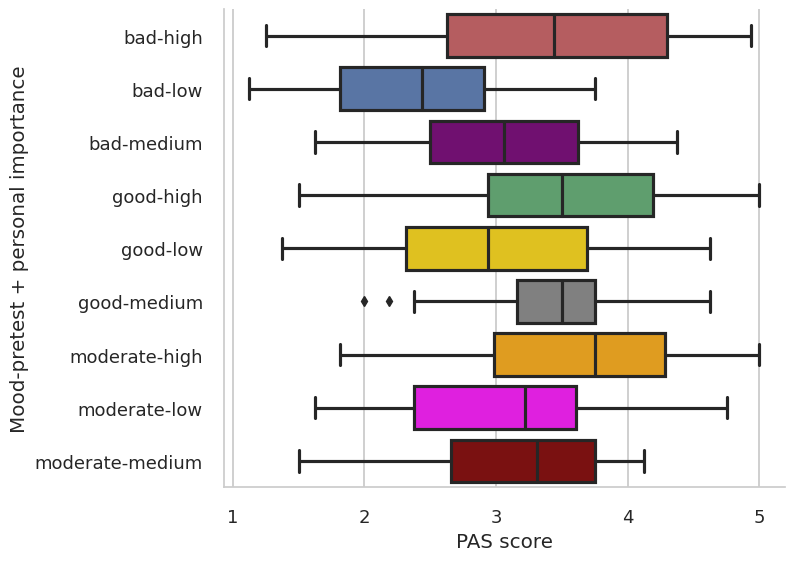

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj1_3cat_waznosc_3cat']),
                y = 'Nastroj1_3cat_waznosc_3cat', x = 'wynik_ogólny', hue = 'Nastroj1_3cat_waznosc_3cat',
            aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['r', 'b', 'purple', 'g', 'gold', 'grey', 'orange', 'magenta', 'darkred'])


g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-pretest + personal importance')
plt.show()

In [ ]:
df['Nastroj2_3cat_waznosc_3cat'] = df.Nastroj2_3cat +"-" +\
                                df.waznosc_3cat.map({0:'medium', 1:'high', 2:'low'})

df['Nastroj2_3cat_waznosc_3cat'].value_counts()

moderate-high      83
bad-high           60
good-high          56
moderate-low       41
good-medium        39
bad-low            33
moderate-medium    30
good-low           28
bad-medium         25
Name: Nastroj2_3cat_waznosc_3cat, dtype: int64

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj2_3cat_waznosc_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
     bad-high         bad-low  -0.5508 0.0278 -1.0693 -0.0322   True
     bad-high      bad-medium  -0.0433    1.0 -0.6129  0.5263  False
     bad-high       good-high   1.0321    0.0  0.5875  1.4767   True
     bad-high        good-low   0.3903 0.3925 -0.1573   0.938  False
     bad-high     good-medium   0.6804 0.0007  0.1883  1.1726   True
     bad-high   moderate-high   0.8099    0.0  0.4044  1.2154   True
     bad-high    moderate-low   0.1093 0.9987 -0.3755  0.5942  False
     bad-high moderate-medium   0.4292 0.2341 -0.1059  0.9642  False
      bad-low      bad-medium   0.5074 0.2376  -0.127  1.1419  False
      bad-low       good-high   1.5828    0.0  1.0577  2.1079   True
      bad-low        good-low   0.9411 0.0001  0.3263  1.5559   True
      bad-low     goo

##Nastroj posttest - dep variable

In [ ]:
for dep in {'Nastroj2_3cat'}:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj1_3cat)+C(komunikat)+C(Nastroj1_3cat):C(komunikat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

Nastroj2_3cat
                                 sum_sq     df        F  PR(>F)
C(Nastroj1_3cat)                48.9952    2.0  48.3021  0.0000
C(komunikat)                     9.7391    2.0   9.6013  0.0001
C(Nastroj1_3cat):C(komunikat)   14.7454    4.0   7.2684  0.0000
Residual                       195.7697  386.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:          Nastroj2_3cat   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     17.98
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           7.30e-23
Time:                        12:08:11   Log-Likelihood:                -421.85
No. Observations:                 395   AIC:                             861.7
Df Residuals:                     386   BIC:                             897.5
Df Model:                         

In [ ]:
df.groupby(['Nastroj1_3cat_komunikat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff'].mean().round(2).reset_index().sort_values(by ='Nastroj2')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_komunikat,Nastroj1,Nastroj2,nastroj_diff
1,bad_neutral,1.65,1.85,0.21
0,bad_negative,1.83,1.94,0.11
6,neutral_negative,3.00,2.64,-0.36
2,bad_positive,1.78,2.65,0.88
7,neutral_neutral,3.00,3.02,0.02
8,neutral_positive,3.00,3.15,0.15
3,good_negative,4.15,3.33,-0.83
4,good_neutral,4.10,3.74,-0.36
5,good_positive,4.16,3.92,-0.24


In [ ]:
for c in {'Nastroj2_3cat'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat_komunikat'],
                          alpha=0.05)
  print(tukey)

Nastroj2_3cat
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
    bad_negative      bad_neutral   0.1258 0.9982 -0.4055  0.6571  False
    bad_negative     bad_positive  -0.7639 0.0001 -1.2743 -0.2535   True
    bad_negative    good_negative   -0.562 0.0093 -1.0436 -0.0803   True
    bad_negative     good_neutral  -0.8697    0.0 -1.3831 -0.3562   True
    bad_negative    good_positive  -0.7565 0.0001 -1.2401 -0.2729   True
    bad_negative neutral_negative  -0.8833    0.0 -1.3801 -0.3866   True
    bad_negative  neutral_neutral  -1.3113    0.0 -1.7827 -0.8399   True
    bad_negative neutral_positive  -1.1139    0.0 -1.6243 -0.6035   True
     bad_neutral     bad_positive  -0.8897    0.0 -1.4079 -0.3715   True
     bad_neutral    good_negative  -0.6878 0.0005 -1.1778 -0.1978   True
     bad_neutral     good_neutral  -0

In [ ]:
tt = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tt.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,bad_negative,bad_neutral,0.1258,0.9982,-0.4055,0.6571,False
1,bad_negative,bad_positive,-0.7639,0.0001,-1.2743,-0.2535,True
2,bad_negative,good_negative,-0.5620,0.0093,-1.0436,-0.0803,True
3,bad_negative,good_neutral,-0.8697,0.0000,-1.3831,-0.3562,True
4,bad_negative,good_positive,-0.7565,0.0001,-1.2401,-0.2729,True


In [ ]:
tt[tt.reject == True].to_excel('/content/drive/MyDrive/temporal.xlsx')

##Nastroj

In [ ]:
# pos

for d in cc:
  dprzed = p3_pos[d[0]].values
  dpo = p3_pos[d[1]].values
  print(d)

  value, p = ttest_rel(dpo, dprzed, alternative='greater') # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
reject H0
t:  2.852 p-value:  0.0025 effect size:  0.22 



In [ ]:
# neg

for d in cc:
  dprzed = p3_neg[d[0]].values
  dpo = p3_neg[d[1]].values
  print(d)

  value, p = ttest_rel(dpo, dprzed, alternative='less')
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
reject H0
t:  -5.472 p-value:  0.0 effect size:  -0.41 



In [ ]:
# neu

for d in cc:
  dprzed = p3_neu[d[0]].values
  dpo = p3_neu[d[1]].values
  print(d)


  value, p = ttest_rel(dpo, dprzed)
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
do NOT reject H0
-0.847615811384459 0.3982 



In [ ]:
for d in {'wynik_ogólny'}:
  p1 = p3_neu[d].values
  p2 = p3_neg[d].values
  p3 = p3_pos[d].values

  print(d, '\n')

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  print('neu - neg ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p1, p3) # , alternative='greater'
  print('neu - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p2, p3) # , alternative='greater'
  print('neg - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p2, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

wynik_ogólny 

neu - neg 
do NOT reject H0
1.0553027231434542 0.2923 

neu - pos 
do NOT reject H0
-1.4623852304790266 0.1448 

neg - pos 
reject H0
t:  -2.451 p-value:  0.0149 effect size:  -0.3 



In [ ]:
for d in {'Nastroj2_3cat'}:
  p1 = p3_neu[d].values
  p2 = p3_neg[d].values
  p3 = p3_pos[d].values

  print(d, '\n')

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  print('neu - neg ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p1, p3) # , alternative='greater'
  print('neu - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p2, p3) # , alternative='greater'
  print('neg - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p2, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj2_3cat 

neu - neg 
reject H0
t:  -2.733 p-value:  0.0067 effect size:  -0.34 

neu - pos 
do NOT reject H0
0.635148406938338 0.5259 

neg - pos 
reject H0
t:  3.531 p-value:  0.0005 effect size:  0.43 



In [ ]:
for d in {'nastroj_diff'}:
  p1 = p3_neu[d].values
  p2 = p3_neg[d].values
  p3 = p3_pos[d].values

  print(d, '\n')

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  print('neu - neg ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p1, p3) # , alternative='greater'
  print('neu - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p2, p3) # , alternative='greater'
  print('neg - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p2, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

nastroj_diff 

neu - neg 
reject H0
t:  3.948 p-value:  0.0001 effect size:  0.49 

neu - pos 
reject H0
t:  -2.825 p-value:  0.0051 effect size:  -0.35 

neg - pos 
reject H0
t:  -5.862 p-value:  0.0 effect size:  -0.72 



In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.2672 0.0201  0.0338  0.5005   True
     0      2  -0.3677 0.0007 -0.6002 -0.1353   True
     1      2  -0.6349    0.0 -0.8674 -0.4025   True
----------------------------------------------------


##additional for article

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc_3cat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2205 0.0986 -0.0307  0.4717  False
   0.0    2.0  -0.4348 0.0012 -0.7218 -0.1479   True
   1.0    2.0  -0.6553    0.0 -0.8997 -0.4109   True
----------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.0523 0.8717 -0.2985   0.194  False
   0.0    2.0  -0.3443 0.0064  -0.608 -0.0807   True
   1.0    2.0  -0.2921  0.026 -0.5561  -0.028   True
----------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj2_3cat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2253 0.0564 -0.0047  0.4553  False
   0.0    2.0  -0.7124    0.0 -0.9451 -0.4797   True
   1.0    2.0  -0.9377    0.0 -1.1828 -0.6926   True
----------------------------------------------------


In [ ]:
tt = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tt.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,bad_high,bad_low,-0.9207,0.0001,-1.5114,-0.3300,True
1,bad_high,bad_medium,-0.2067,0.9842,-0.8409,0.4275,False
2,bad_high,good_high,0.0960,0.9994,-0.3803,0.5723,False
3,bad_high,good_low,-0.3667,0.5369,-0.9356,0.2022,False
4,bad_high,good_medium,0.1096,0.9995,-0.4455,0.6648,False


In [ ]:
tt[tt.reject == True].to_excel('/content/drive/MyDrive/temporal.xlsx')

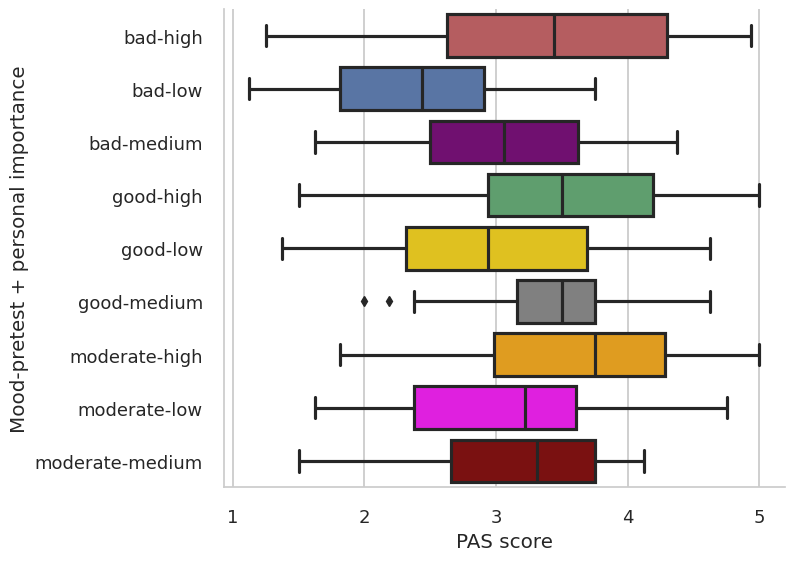

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj1_3cat_waznosc_3cat']),
                y = 'Nastroj1_3cat_waznosc_3cat', x = 'wynik_ogólny', hue = 'Nastroj1_3cat_waznosc_3cat',
            aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['r', 'b', 'purple', 'g', 'gold', 'grey', 'orange', 'magenta', 'darkred'])


g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-pretest + personal importance')
plt.show()

In [ ]:
df['Nastroj2_3cat_waznosc_3cat'] = df.Nastroj2_3cat +"-" +\
                                df.waznosc_3cat.map({0:'medium', 1:'high', 2:'low'})

df['Nastroj2_3cat_waznosc_3cat'].value_counts()

moderate-high      83
bad-high           60
good-high          56
moderate-low       41
good-medium        39
bad-low            33
moderate-medium    30
good-low           28
bad-medium         25
Name: Nastroj2_3cat_waznosc_3cat, dtype: int64

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj2_3cat_waznosc_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
     bad-high         bad-low  -0.5508 0.0278 -1.0693 -0.0322   True
     bad-high      bad-medium  -0.0433    1.0 -0.6129  0.5263  False
     bad-high       good-high   1.0321    0.0  0.5875  1.4767   True
     bad-high        good-low   0.3903 0.3925 -0.1573   0.938  False
     bad-high     good-medium   0.6804 0.0007  0.1883  1.1726   True
     bad-high   moderate-high   0.8099    0.0  0.4044  1.2154   True
     bad-high    moderate-low   0.1093 0.9987 -0.3755  0.5942  False
     bad-high moderate-medium   0.4292 0.2341 -0.1059  0.9642  False
      bad-low      bad-medium   0.5074 0.2376  -0.127  1.1419  False
      bad-low       good-high   1.5828    0.0  1.0577  2.1079   True
      bad-low        good-low   0.9411 0.0001  0.3263  1.5559   True
      bad-low     goo

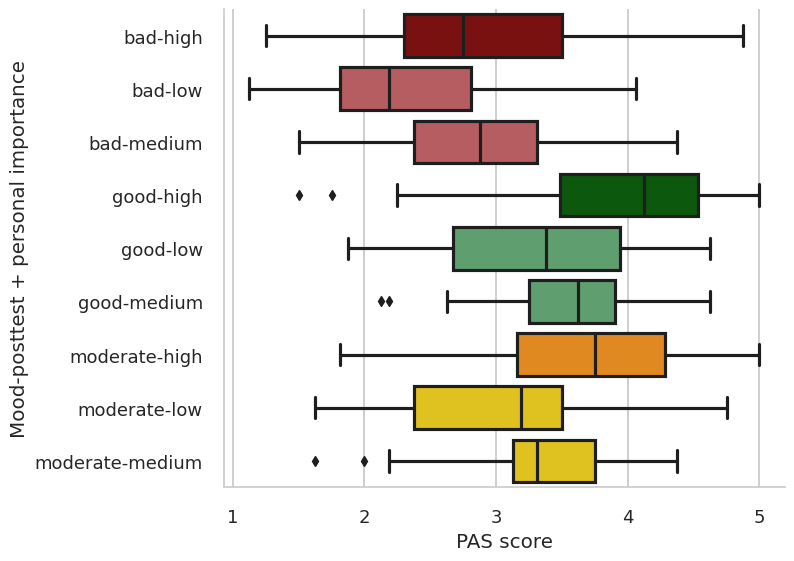

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj2_3cat_waznosc_3cat']),
                y = 'Nastroj2_3cat_waznosc_3cat', x = 'wynik_ogólny', hue = 'Nastroj2_3cat_waznosc_3cat',
            aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['darkred', 'r', 'r', 'darkgreen', 'g', 'g', 'darkorange', 'gold', 'gold'])


g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-posttest + personal importance')
plt.show()

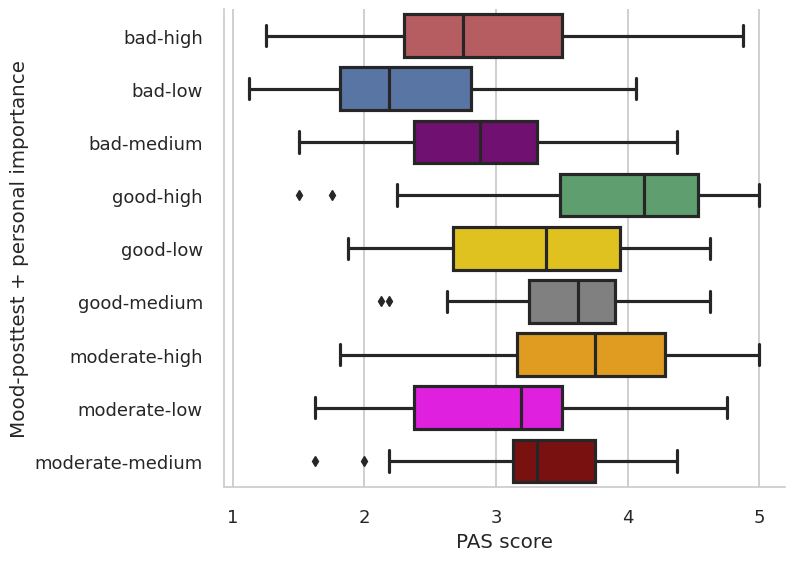

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj2_3cat_waznosc_3cat']),
                y = 'Nastroj2_3cat_waznosc_3cat', x = 'wynik_ogólny', hue = 'Nastroj2_3cat_waznosc_3cat',
            aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['r', 'b', 'purple', 'g', 'gold', 'grey', 'orange', 'magenta', 'darkred'])


g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-posttest + personal importance')
plt.show()

In [ ]:
df['Nastroj2_3cat'] = df.Nastroj2_3cat.map({0:'moderate', 1:'good', 2:'bad'})

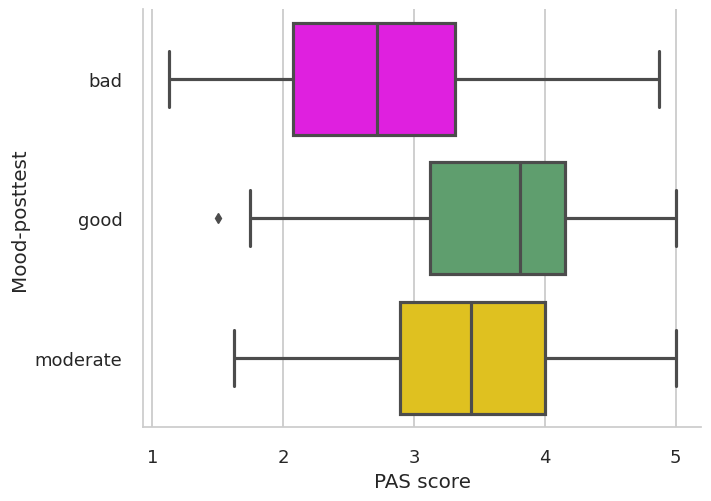

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['wynik_ogólny']),
                y = 'Nastroj2_3cat', x = 'wynik_ogólny', hue = 'Nastroj2_3cat',
            palette = ['magenta', 'g', 'gold'], aspect=1.4,
                height=5.2, dodge=False, legend=False)
g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-posttest')
plt.show()

In [ ]:
df['Nastroj1_3cat_komunikat'] = df.Nastroj1_3cat.map({0:'moderate', 1:'good', 2:'bad'}) + "-" +\
                                 df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'})

df['Nastroj1_3cat_komunikat'].value_counts()

moderate-neutral     58
good-negative        52
good-positive        51
moderate-negative    45
bad-positive         40
moderate-positive    40
good-neutral         39
bad-negative         36
bad-neutral          34
Name: Nastroj1_3cat_komunikat, dtype: int64

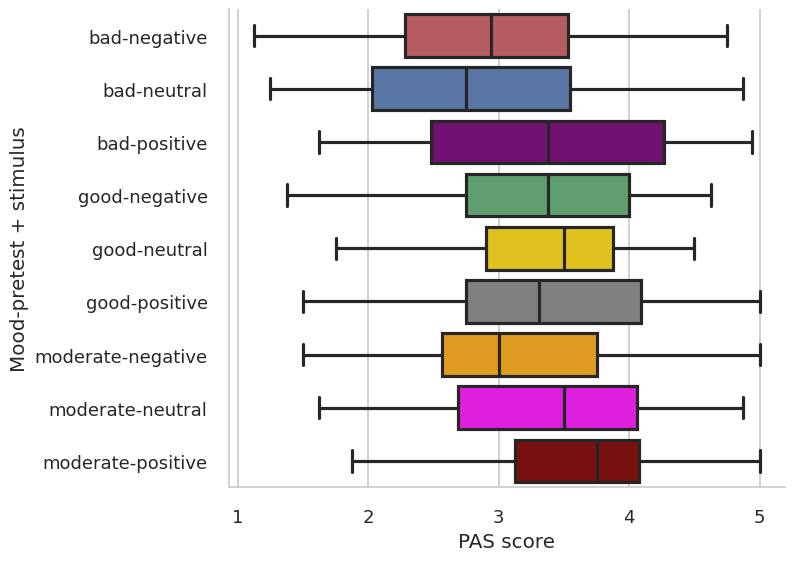

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj1_3cat_komunikat']),
                y = 'Nastroj1_3cat_komunikat', x = 'wynik_ogólny', hue = 'Nastroj1_3cat_komunikat',
             aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['r', 'b', 'purple', 'g', 'gold', 'grey', 'orange', 'magenta', 'darkred'])
g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-pretest + stimulus')
plt.show()

In [ ]:
df['Nastroj2_3cat_komunikat'] = df.Nastroj2_3cat + "-" +\
                                 df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'})

df['Nastroj2_3cat_komunikat'].value_counts()

bad-negative         60
moderate-neutral     58
good-positive        57
moderate-positive    52
moderate-negative    44
good-neutral         37
bad-neutral          36
good-negative        29
bad-positive         22
Name: Nastroj2_3cat_komunikat, dtype: int64

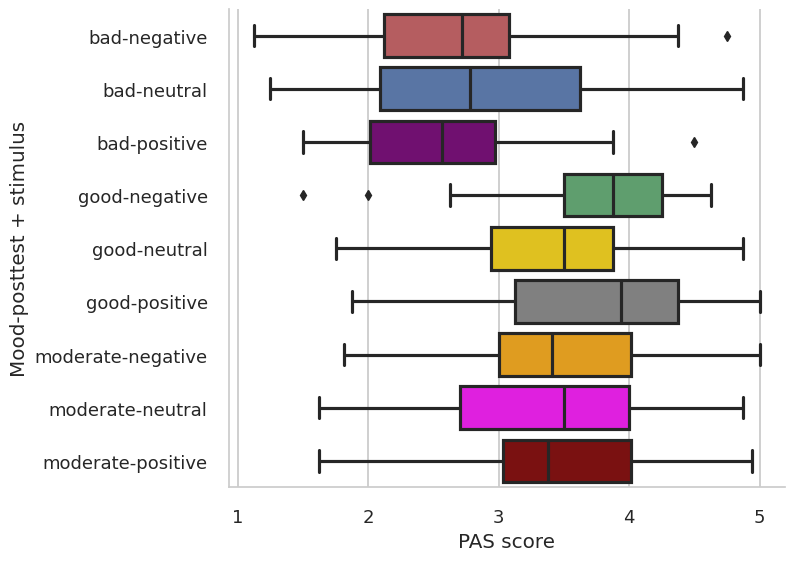

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj2_3cat_komunikat']),
                y = 'Nastroj2_3cat_komunikat', x = 'wynik_ogólny', hue = 'Nastroj2_3cat_komunikat',
             aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['r', 'b', 'purple', 'g', 'gold', 'grey', 'orange', 'magenta', 'darkred'])
g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-posttest + stimulus')
plt.show()

In [ ]:
df.groupby(['Nastroj1_3cat_waznosc_3cat'])['wynik_ogólny'].mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_waznosc_3cat,wynik_ogólny
0,bad_high,3.35
1,bad_low,2.43
2,bad_medium,3.15
3,good_high,3.45
4,good_low,2.99
5,good_medium,3.46
6,neutral_high,3.65
7,neutral_low,3.06
8,neutral_medium,3.16


In [ ]:
df['waznosc_3cat_komunikat'] = df.waznosc_3cat.map({0:'medium', 1:'low', 2:'high'}) + "_" +\
                                 df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'})

df['waznosc_3cat_komunikat'].value_counts()

low_negative       76
low_neutral        71
low_positive       52
high_positive      41
medium_positive    38
high_negative      32
medium_neutral     31
high_neutral       29
medium_negative    25
Name: waznosc_3cat_komunikat, dtype: int64

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc_3cat_komunikat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
  high_negative    high_neutral   0.1735 0.9967 -0.4991  0.8461  False
  high_negative   high_positive   0.1883 0.9899 -0.4305   0.807  False
  high_negative    low_negative   0.6118 0.0177   0.059  1.1646   True
  high_negative     low_neutral   0.6721 0.0062  0.1136  1.2306   True
  high_negative    low_positive   1.1743    0.0  0.5849  1.7637   True
  high_negative medium_negative   0.4288 0.6072 -0.2715   1.129  False
  high_negative  medium_neutral   0.5978 0.1127 -0.0633  1.2589  False
  high_negative medium_positive   0.6151 0.0612 -0.0143  1.2445  False
   high_neutral   high_positive   0.0148    1.0 -0.6217  0.6513  False
   high_neutral    low_negative   0.4384 0.2934 -0.1342  1.0109  False
   high_neutral     low_neutral   0.4986 0.1546 -0.0795  1.0767 

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc_3cat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2205 0.0986 -0.0307  0.4717  False
   0.0    2.0  -0.4348 0.0012 -0.7218 -0.1479   True
   1.0    2.0  -0.6553    0.0 -0.8997 -0.4109   True
----------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1594 0.3155 -0.0989 0.4176  False
     0      2  -0.1139  0.551 -0.3712 0.1433  False
     1      2  -0.2733 0.0343 -0.5305 -0.016   True
---------------------------------------------------
